In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 26

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 42)                168       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                      

In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
190/214 [=========================>....] - ETA: 0s - loss: 3.9919 - accuracy: 0.1644
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 1s 3ms/step - loss: 3.9027 - accuracy: 0.1726 - val_loss: 3.1100 - val_accuracy: 0.2602
Epoch 2/1000
181/214 [========================>.....] - ETA: 0s - loss: 2.8220 - accuracy: 0.2810
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 0s 2ms/step - loss: 2.7875 - accuracy: 0.2879 - val_loss: 2.4030 - val_accuracy: 0.4156
Epoch 3/1000
185/214 [========================>.....] - ETA: 0s - loss: 2.4717 - accuracy: 0.3572
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
214/214 [==============================] - 0s 2ms/step - loss: 2.4604 - accuracy: 0.3586 - val_loss: 2.1589 - val_accuracy: 0.4728
Epoch 4/1000
185/214 [========================>.....] - ETA: 0s - loss: 2.3226 - a

In [34]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

72/72 [==============================] - 0s 981us/step - loss: 0.7396 - accuracy: 0.8610


In [35]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 44ms/step
[3.2879745e-03 4.9783992e-08 5.1837414e-08 3.4145421e-07 1.0245185e-06
 4.7285980e-07 3.9080046e-06 8.5449139e-12 1.0444822e-03 1.7903264e-04
 7.7865288e-06 9.4868301e-05 1.2256590e-05 1.1016953e-07 1.1298443e-05
 1.2866410e-09 4.9239466e-09 1.6775457e-09 8.0287703e-07 2.3615859e-04
 9.5409358e-10 9.1225716e-10 3.6948109e-07 6.5525819e-06 9.9511248e-01
 2.5154055e-08]
24


# Confusion matrix

285/285 [==============================] - 0s 857us/step


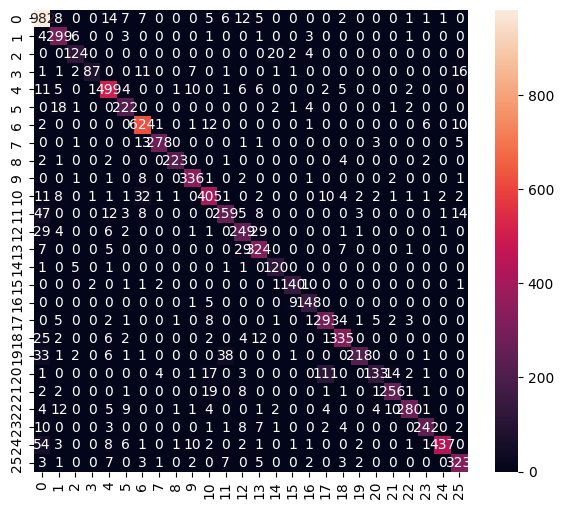

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1051
           1       0.81      0.94      0.87       318
           2       0.87      0.83      0.85       150
           3       0.96      0.68      0.79       128
           4       0.86      0.90      0.88       553
           5       0.84      0.88      0.86       251
           6       0.88      0.95      0.91       657
           7       0.97      0.92      0.94       302
           8       0.98      0.95      0.96       235
           9       0.91      0.95      0.93       353
          10       0.84      0.83      0.83       489
          11       0.82      0.72      0.77       360
          12       0.75      0.77      0.76       324
          13       0.81      0.87      0.84       373
          14       0.81      0.93      0.87       129
          15       0.90      0.89      0.89       158
          16       0.85      0.91      0.88       163
     

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [38]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [39]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpdm1xllfc\assets


INFO:tensorflow:Assets written to: C:\Users\asusg\AppData\Local\Temp\tmpdm1xllfc\assets


25176

# Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 4.64 ms


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.8779062e-03 4.3515342e-08 4.5718554e-08 3.0386323e-07 8.5708109e-07
 4.0149325e-07 3.5321791e-06 7.4898473e-12 9.0636604e-04 1.6149273e-04
 7.0539604e-06 9.0892005e-05 1.0583010e-05 9.3040903e-08 9.3756071e-06
 1.1751931e-09 4.5462611e-09 1.3466411e-09 6.6406932e-07 2.1929979e-04
 7.7895984e-10 7.5600248e-10 3.3496627e-07 5.4423335e-06 9.9570531e-01
 2.3175753e-08]
24
